In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics

## Following is the z-score analysis for Fall 2020 and Spring 2021 screens. 

<p> We need to combine all of the data for both control and reference compounds to genereate an understanding of how these compounds are performing</p>

1. Controls = DMSO and Null (empty) wells
2. Positve references = Isoamyl Alcohol and Diacetyl
3. Negative references = (+)Carvone, (-)Carvone and 2-nonanone

### Reading in and cleaning all of Fall 2020 and Spring 2021 reference and control data

In [2]:
#Reading in all data from Fall 2020 screen
fall20_data = pd.read_csv('/Volumes/LaCie/_2020_11_screen/Fall20_analysis_ub.csv')

In [3]:
#Creating a list of reference compounds used in Fall 2020 analysis
# 2-nonanone was not tested in Fall 2020

fall_ref_list = ['(S)-(-)-Carvone', '(S)-(+)-Carvone', 'Diacetyl', 'Isoamyl alcohol*', 'DMSO']
spring_ref_list = ['R(-)-Carvone', 'R(+)-Carvone','Empty' ,'Diacetyl', 'Isoamyl Alcohol', 'DMSO']

In [4]:
# Subset Fall 2020 reference compounds into a new df
fall_ref_data = fall20_data[(fall20_data['Compound'].isin(fall_ref_list))].reset_index(drop=True)
                             

In [5]:
# Read in Spring 2021 data and subset reference compounds
spring_data = pd.read_csv('/Volumes/LaCie/_2021_03_screen/2103_data_unblinded.csv').reset_index(drop=True)
spring_ref_data = spring_data[(spring_data['Compound Name'].isin(spring_ref_list))].reset_index(drop=True)

In [6]:
#Cleaning up the Spring df to concat with Fall df
spring_ref_data = spring_ref_data.loc[:, ~spring_ref_data.columns.str.contains('^Unnamed')]
spring_ref_data = spring_ref_data.drop(columns=['Strain', 'Slot', 'Well', 'Compound'])
spring_ref_data.rename(columns={'Compound Name':'Compound'}, inplace=True)
spring_ref_data.head()

,WellNo,Total Worms,Chemotaxis,File Name,Plate ID,Compound
0,2A,101,-0.408451,NPP_210319_POST_003,NPP_210319_008,R(-)-Carvone
1,1A,104,-0.648649,NPP_210322_POST_004,NPP_210322_013,R(-)-Carvone
2,2A,197,-0.014085,NPP_210325_POST_004,NPP_210325_014,R(-)-Carvone
3,1A,189,0.291139,NPP_210319_POST_001,NPP_210319_001,Isoamyl Alcohol
4,3A,243,0.881818,NPP_210322_POST_005,NPP_210322_019,Isoamyl Alcohol


In [7]:
fall_ref_data = fall_ref_data.loc[:, ~fall_ref_data.columns.str.contains('^Unnamed')]
fall_ref_data = fall_ref_data.drop(columns=['Strain'])
fall_ref_data.head()

,WellNo,Total Worms,Chemotaxis,Compound,File Name,Plate ID
0,4B,219,-0.129534,(S)-(-)-Carvone,NPP_201030_01_fin,NPP_201030_004
1,2A,196,-0.313953,Isoamyl alcohol*,NPP_201030_02_fin,NPP_201030_006
2,4A,272,-0.424893,DMSO,NPP_201030_02_fin,NPP_201030_008
3,4C,235,-0.633803,(S)-(+)-Carvone,NPP_201030_02_fin,NPP_201030_008
4,1B,233,0.656109,Diacetyl,NPP_201030_03_fin,NPP_201030_009


In [8]:
#Cleaning up the Fall df to concat with the Spring df
fall_cols = fall_ref_data.columns.tolist()
fall_cols = fall_cols[:3] + fall_cols[4:6] + fall_cols[3:4]
fall_ref_data = fall_ref_data[fall_cols]
fall_ref_data.head()

,WellNo,Total Worms,Chemotaxis,File Name,Plate ID,Compound
0,4B,219,-0.129534,NPP_201030_01_fin,NPP_201030_004,(S)-(-)-Carvone
1,2A,196,-0.313953,NPP_201030_02_fin,NPP_201030_006,Isoamyl alcohol*
2,4A,272,-0.424893,NPP_201030_02_fin,NPP_201030_008,DMSO
3,4C,235,-0.633803,NPP_201030_02_fin,NPP_201030_008,(S)-(+)-Carvone
4,1B,233,0.656109,NPP_201030_03_fin,NPP_201030_009,Diacetyl


In [9]:
# Combining Spring and Fall reference data
ref_compound_dat = pd.concat([spring_ref_data, fall_ref_data], ignore_index=True)


In [10]:
# Need to consistently name ref compounds. Different naming conventions used between Fall 
# and Spring screen.
def clean_compounds(row):
    if row['Compound'] == 'Isoamyl Alcohol' or row['Compound'] == 'Isoamyl alcohol*':
        return('Isoamyl alcohol')
    if row['Compound'] == '(S)-(-)-Carvone' or row['Compound'] == 'R(-)-Carvone':
        return('(-)-Carvone')
    if row['Compound'] == '(S)-(+)-Carvone' or row['Compound'] == 'R(+)-Carvone':
        return('(+)-Carvone')
    if row['Compound'] == '(S)-(+)-Carvone' or row['Compound'] == 'R(+)-Carvone':
        return('(+)-Carvone')
    else:
        return(row['Compound'])

In [11]:
ref_compound_dat['Compound'] = ref_compound_dat.apply(
    lambda row: clean_compounds(row), axis=1)
ref_compound_dat

,WellNo,Total Worms,Chemotaxis,File Name,Plate ID,Compound
0,2A,101,-0.408451,NPP_210319_POST_003,NPP_210319_008,(-)-Carvone
1,1A,104,-0.648649,NPP_210322_POST_004,NPP_210322_013,(-)-Carvone
2,2A,197,-0.014085,NPP_210325_POST_004,NPP_210325_014,(-)-Carvone
3,1A,189,0.291139,NPP_210319_POST_001,NPP_210319_001,Isoamyl alcohol
4,3A,243,0.881818,NPP_210322_POST_005,NPP_210322_019,Isoamyl alcohol
5,1A,306,0.393258,NPP_210325_POST_001,NPP_210325_001,Isoamyl alcohol
6,4D,203,0.033708,NPP_210319_POST_001,NPP_210319_004,DMSO
7,2D,267,0.154185,NPP_210322_POST_006,NPP_210322_022,DMSO
8,4D,277,0.195312,NPP_210325_POST_001,NPP_210325_004,DMSO
9,2C,301,-0.697674,NPP_210319_POST_005,NPP_210319_014,(+)-Carvone


### Adding categorical data about type of control (+, -, 0)

In [12]:
pos = ['Diacetyl', 'Isoamyl alcohol']
neg = ['(-)-Carvone', '(+)-Carvone']
null = ['Empty', 'DMSO']

In [13]:
def add_ref_val(row, pos, neg, null):
    if row['Compound'] in pos:
        ref_type = 'Pos'
    if row['Compound'] in neg:
        ref_type = 'Neg'
    if row['Compound'] in null:
        ref_type = 'Null'
    return ref_type

In [14]:
ref_compound_dat['Type'] = ref_compound_dat.apply(
    lambda row: add_ref_val(row, pos, neg, null), axis=1).astype('category')
ref_compound_dat

,WellNo,Total Worms,Chemotaxis,File Name,Plate ID,Compound,Type
0,2A,101,-0.408451,NPP_210319_POST_003,NPP_210319_008,(-)-Carvone,Neg
1,1A,104,-0.648649,NPP_210322_POST_004,NPP_210322_013,(-)-Carvone,Neg
2,2A,197,-0.014085,NPP_210325_POST_004,NPP_210325_014,(-)-Carvone,Neg
3,1A,189,0.291139,NPP_210319_POST_001,NPP_210319_001,Isoamyl alcohol,Pos
4,3A,243,0.881818,NPP_210322_POST_005,NPP_210322_019,Isoamyl alcohol,Pos
5,1A,306,0.393258,NPP_210325_POST_001,NPP_210325_001,Isoamyl alcohol,Pos
6,4D,203,0.033708,NPP_210319_POST_001,NPP_210319_004,DMSO,Null
7,2D,267,0.154185,NPP_210322_POST_006,NPP_210322_022,DMSO,Null
8,4D,277,0.195312,NPP_210325_POST_001,NPP_210325_004,DMSO,Null
9,2C,301,-0.697674,NPP_210319_POST_005,NPP_210319_014,(+)-Carvone,Neg


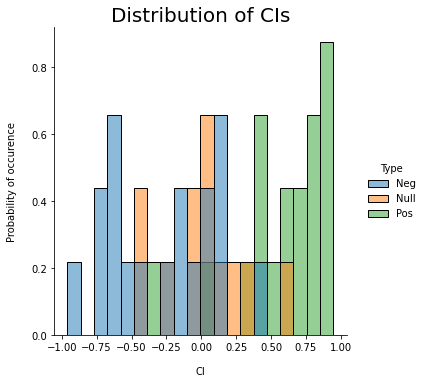

In [15]:
sns.displot(x='Chemotaxis', bins=20, stat='density', data=ref_compound_dat, hue='Type')
plt.xlabel("CI", labelpad=14)
plt.ylabel("Probability of occurence", labelpad=14)
plt.title("Distribution of CIs", y=1, fontsize=20);


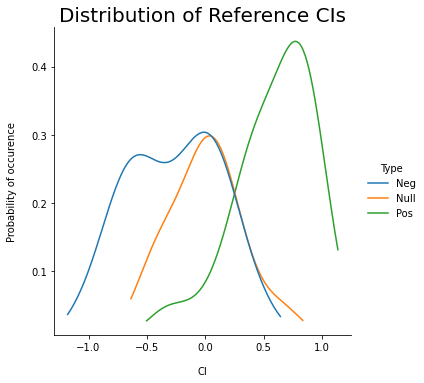

In [21]:

sns.displot(x='Chemotaxis', kind='kde', data=ref_compound_dat, hue='Type', cut=1)
plt.xlabel("CI", labelpad=14)
plt.ylabel("Probability of occurence", labelpad=14)
plt.title("Distribution of Reference CIs", y=1, fontsize=20);
plt.savefig('/Volumes/LaCie/_2021_03_screen/controlCIs_dist.png')

Type
Neg     AxesSubplot(0.125,0.125;0.775x0.755)
Null    AxesSubplot(0.125,0.125;0.775x0.755)
Pos     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Zscore, dtype: object

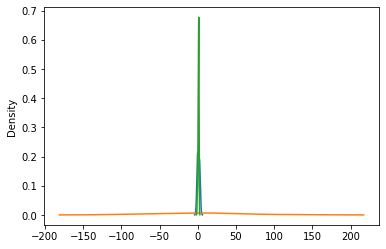

In [45]:
ref_compound_dat.head()

,WellNo,Total Worms,Chemotaxis,File Name,Plate ID,Compound,Type
0,2A,101,-0.408451,NPP_210319_POST_003,NPP_210319_008,(-)-Carvone,Neg
1,1A,104,-0.648649,NPP_210322_POST_004,NPP_210322_013,(-)-Carvone,Neg
2,2A,197,-0.014085,NPP_210325_POST_004,NPP_210325_014,(-)-Carvone,Neg
3,1A,189,0.291139,NPP_210319_POST_001,NPP_210319_001,Isoamyl alcohol,Pos
4,3A,243,0.881818,NPP_210322_POST_005,NPP_210322_019,Isoamyl alcohol,Pos
